In [28]:
from app.site.data import DataHandler

data = DataHandler()

[2024-04-27 13:40:15,608:    INFO] Initializing DataHandler... (data.py:27)
[2024-04-27 13:40:24,158:    INFO] DataHandler initialized in 8 seconds. (data.py:41)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from app.site.common import PathHandler
from app.site.graphing import bias_colors
from app.utils import Bias

,Agency,Credibility,Bias,Country,Churn,Vader,Afinn
0,ABC News,High,-1,United States,1.68,-0.10,-0.09
1,AP,High,-1,United States,2.21,-0.04,-0.02
2,Al Jazeera,Mixed,-1,Qatar,1.17,-0.22,-0.13
3,Alternet,Mixed,-3,United States,1.00,-0.05,-0.04
4,Axios,High,-1,United States,2.13,-0.03,-0.03
...,...,...,...,...,...,...,...
112,Washington Examiner,Mixed,2,United States,1.20,-0.04,-0.02
113,Winnipeg Free Press,High,0,Canada,1.16,-0.09,-0.06
114,Xinhua,Mixed,-2,China,1.04,0.11,0.06
115,Yahoo News,High,-1,United States,1.11,-0.08,-0.05


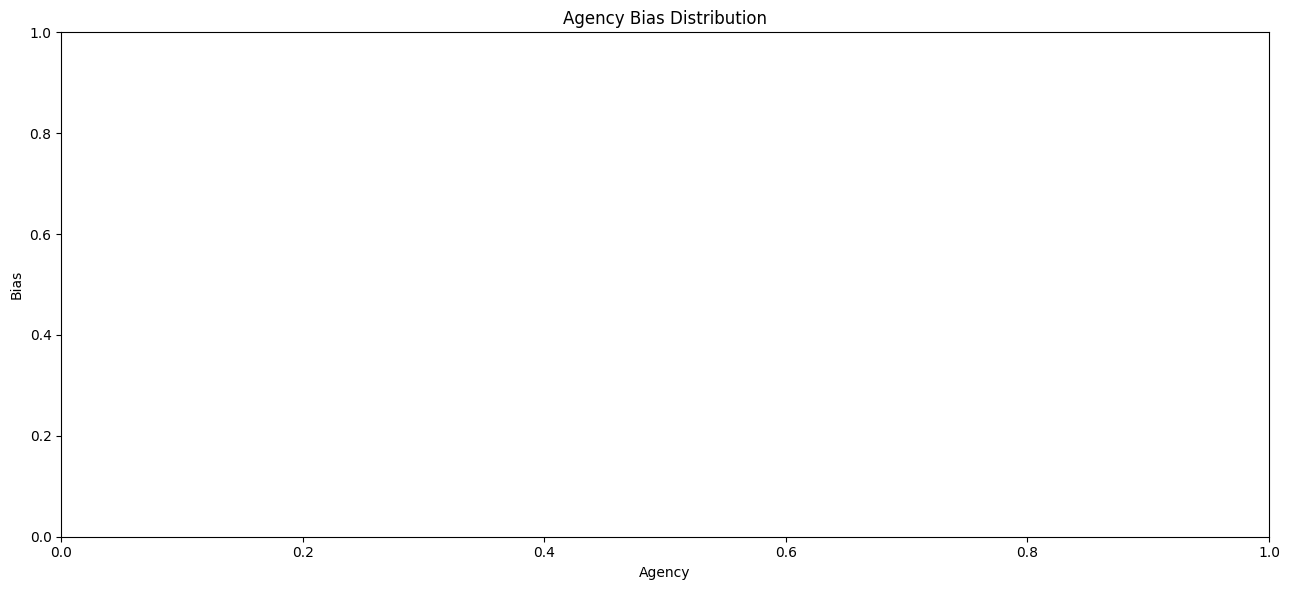

In [12]:
df = data.agency_data
fig, ax = plt.subplots(figsize=(13, 6))
df['Bias'] = df['Bias'].map({str(b): b.value for b in list(Bias)})
# get counts of each bias
bias_counts = df['Bias'].value_counts().sort_index()
# horizontal bar plot with stacked from left single row
left = 0
for i in bias_counts.index:
    n = bias_counts[i]
    ax.barh(n, 0, color=bias_colors[i], left=left)
    left += n
ax.set_title('Agency Bias Distribution')
ax.set_ylabel('Bias')
ax.set_xlabel('Agency')
plt.tight_layout()
plt.savefig(PathHandler(PathHandler.FileNames.agency_distribution).build)

In [7]:
bias_counts

Bias
-3     3
-2    19
-1    37
 0    17
 1    19
 2    14
 3     8
Name: count, dtype: int64

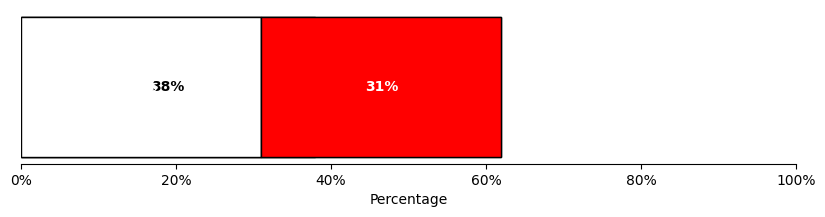

In [13]:
# Correcting the code to use a stacked horizontal bar chart
import numpy as np

# Values for each group
left_values = [31, 0, 31]  # Left and Right are 31%
center_values = [0, 38, 0]  # Center is 38%

# The position of the bars on the y-axis
positions = [0]

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 2))

# In order to stack the bars side-by-side, we need to specify the left parameter
# The left parameter shifts the start point of the bar.
ax.barh(positions, left_values, color='blue', edgecolor='black', height=0.5)
ax.barh(positions, center_values, left=left_values, color='white', edgecolor='black', height=0.5)
ax.barh(positions, left_values, left=np.add(left_values, center_values), color='red', edgecolor='black', height=0.5)

# Removing y-ticks
ax.set_yticks([])

# Setting the x-ticks to be percentages
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# Setting the x-axis label
ax.set_xlabel('Percentage')

# Setting the limit for the x-axis
ax.set_xlim(0, 100)

# Removing the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Removing the y-axis altogether
ax.yaxis.set_visible(False)

# To add the values on the bars, we calculate the position for each label
for i, v in enumerate(left_values):
    if v > 0:  # Left part
        ax.text(v / 2, positions[0], f'{v}%', color='white', fontweight='bold', va='center', ha='center')
    if center_values[i] > 0:  # Center part
        ax.text(v + center_values[i] / 2, positions[0], f'{center_values[i]}%', color='black', fontweight='bold', va='center', ha='center')
    if left_values[i] > 0 and i == len(left_values) - 1:  # Right part
        ax.text(v + center_values[i] + v / 2, positions[0], f'{v}%', color='white', fontweight='bold', va='center', ha='center')

# Show plot
plt.show()


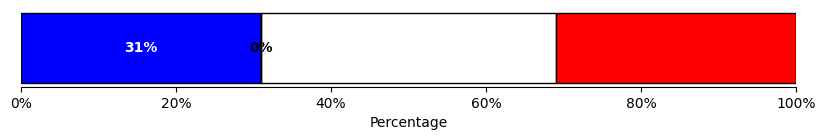

In [14]:
# Corrected code for a stacked horizontal bar chart with the "Left" section visible

# We will create three separate bars and use their widths to simulate stacking

# The base start for the bars
base = [0]

# The left section starts at 0
left_section = [31]  # Width of the left section

# The center section starts where the left section ends
center_section = [31]  # It needs to start where the left section ends

# The right section starts where the center section ends
right_section = [69]  # It needs to start where the left + center ends

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 1))

# Plot the left section
ax.barh(base, left_section, color='blue', edgecolor='black', height=0.5)

# Plot the center section, starting after the left section
ax.barh(base, center_values, left=left_section, color='white', edgecolor='black', height=0.5)

# Plot the right section, starting after the center section
ax.barh(base, left_section, left=right_section, color='red', edgecolor='black', height=0.5)

# Removing y-ticks
ax.set_yticks([])

# Setting the x-ticks to be percentages
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# Setting the x-axis label
ax.set_xlabel('Percentage')

# Setting the limit for the x-axis
ax.set_xlim(0, 100)

# Removing the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Removing the y-axis altogether
ax.yaxis.set_visible(False)

# Adding the values on the bars
ax.text(left_section[0] / 2, base[0], f'{left_section[0]}%', color='white', fontweight='bold', va='center', ha='center')
ax.text(left_section[0] + center_values[0] / 2, base[0], f'{center_values[0]}%', color='black', fontweight='bold', va='center', ha='center')
ax.text(left_section[0] + center_values[0] + left_section[0] / 2, base[0], f'{left_section[0]}%', color='white', fontweight='bold', va='center', ha='center')

# Show plot
plt.show()


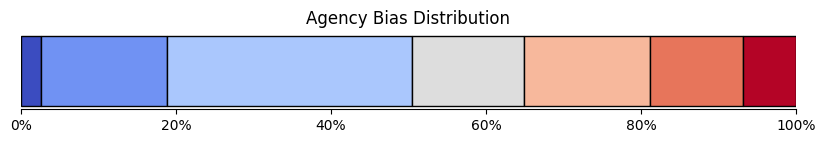

In [37]:
df = data.agency_data.copy()
df['Bias'] = df['Bias'].map({str(b): b.value for b in list(Bias)})
df['Credibility'] = df['Credibility'].map({str(b): b.value for b in list(Bias)})
colors = ["#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#9ACD32", "#008000"]

fig, ax = plt.subplots(figsize=(10, 1))

bias_colors = ['#3b4cc0', '#7092f3', '#aac7fd', '#dddddd', '#f7b89c', '#e7755b', '#b40426']
base = 0  # Since we only have a single axis we only need a single left value, right?
bias_counts = df['Bias'].value_counts().sort_index()
for i in bias_counts.index:
    n = bias_counts[i]
    n = n / bias_counts.sum() * 100  # Get the percentage of the whole
    ax.barh(' ', n, color=bias_colors[i+3], edgecolor='black', height=0.5, left=base)
    base += 

# Removing y-ticks
ax.set_yticks([])

# Setting the x-ticks to be percentages
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

ax.set_title("Agency Bias Distribution")

# Setting the limit for the x-axis
ax.set_xlim(0, 100)

# Removing the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# Removing the y-axis altogether
ax.yaxis.set_visible(False)

# Show plot
plt.show()


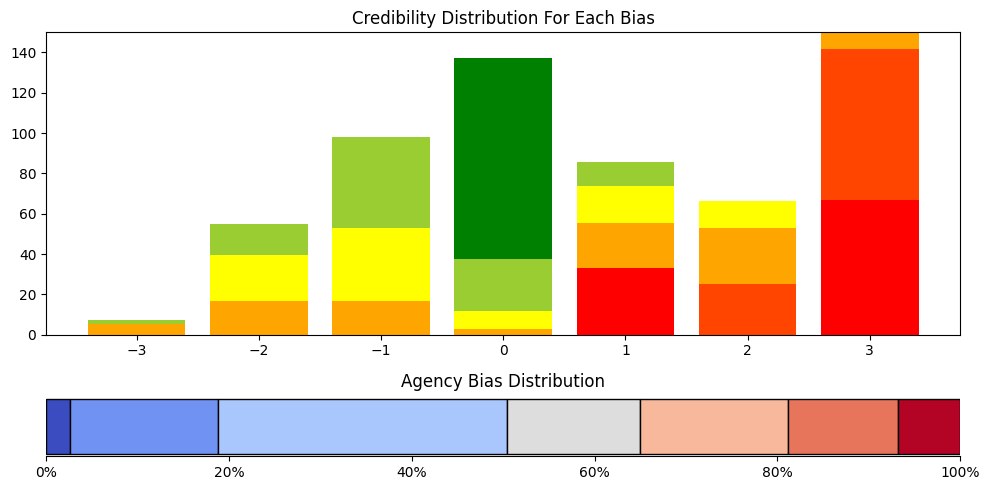

In [67]:
from app.utils import Credibility
df = data.agency_data.copy()
df['Bias'] = df['Bias'].map({str(b): b.value for b in list(Bias)})
df['Credibility'] = df['Credibility'].map({str(b): b.value for b in list(Credibility)})
bias_colors = ['#3b4cc0', '#7092f3', '#aac7fd', '#dddddd', '#f7b89c', '#e7755b', '#b40426']
credibility_colors = ["#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#9ACD32", "#008000"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [5, 1]})

bottom = pd.Series(np.zeros(len(df['Bias'].unique())), index=df['Bias'].sort_values().unique())
for n in df['Credibility'].sort_values().unique():
    # get the bias counts within this credibility
    bias_counts = df[df['Credibility'] == n]['Bias'].value_counts().sort_index()
    # convert bias_counts to percentages of the whole
    bias_counts = bias_counts.reindex(bottom.index, fill_value=0)
    ax1.bar(bias_counts.index, bias_counts, bottom=bottom, color=credibility_colors[n])
    bottom += bias_counts
    
ax1.set_title("Credibility Distribution For Each Bias")

base = 0  # Since we only have a single axis we only need a single left value, right?
bias_counts = df['Bias'].value_counts().sort_index()
for i in bias_counts.index:
    n = bias_counts[i]
    n = n / bias_counts.sum() * 100  # Get the percentage of the whole
    ax2.barh(' ', n, color=bias_colors[i+3], edgecolor='black', height=0.5, left=base)
    base += n

# Removing y-ticks
ax2.set_yticks([])

# Setting the x-ticks to be percentages
ax2.set_xticks([0, 20, 40, 60, 80, 100])
ax2.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

ax2.set_title("Agency Bias Distribution")

ax2.set_xlim(0, 100)
for spine in ['right', 'top', 'left']:
    ax2.spines[spine].set_visible(False)
ax2.yaxis.set_visible(False)

plt.tight_layout()

# Show plot
plt.show()



In [52]:
df['Credibility'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [56]:
np.zeros(len(df['Credibility'].unique()))

array([0., 0., 0., 0., 0., 0.])

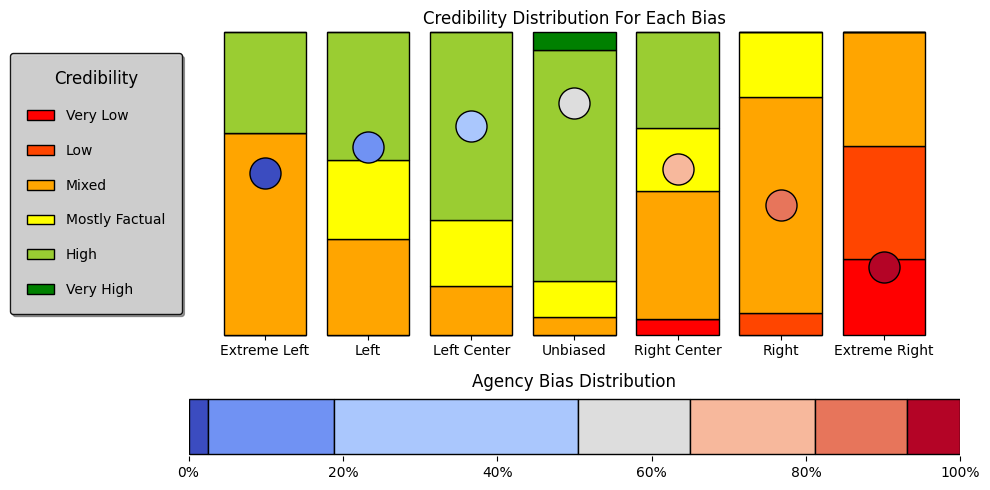

In [96]:
from app.utils import Credibility
df = data.agency_data.copy()
df['Bias'] = df['Bias'].map({str(b): b.value for b in list(Bias)})
df['Credibility'] = df['Credibility'].map({str(b): b.value for b in list(Credibility)})
bias_colors = ['#3b4cc0', '#7092f3', '#aac7fd', '#dddddd', '#f7b89c', '#e7755b', '#b40426']
credibility_colors = ["#FF0000", "#FF4500", "#FFA500", "#FFFF00", "#9ACD32", "#008000"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [5, 1]})

total_counts_by_bias = df['Bias'].value_counts().sort_index()

# the bottom should start at 0.1
bottom = pd.Series(np.zeros(len(df['Bias'].unique())), index=df['Bias'].sort_values().unique())
# Loop through each credibility level
for n in sorted(df['Credibility'].unique()):
    # Get the counts of bias within this credibility level
    bias_counts = df[df['Credibility'] == n]['Bias'].value_counts().sort_index()
    # Reindex bias_counts to ensure it includes all bias levels (fills missing levels with 0)
    bias_counts = bias_counts.reindex(total_counts_by_bias.index, fill_value=0)
    # Convert counts to percentages of the total counts for each bias level
    percentages = (bias_counts / total_counts_by_bias) * 100

    # Plotting
    ax1.bar(
        bias_counts.index,
        percentages,
        edgecolor='black',
        bottom=bottom,
        color=credibility_colors[n],
        label=str(Credibility(n)),
        clip_on=False
    )
    
    # Update the bottom for the next stack
    bottom += percentages
plt.subplots_adjust(right=1) 
ax1.legend(loc='center right', bbox_to_anchor=(0, 0.5),
           frameon=True, facecolor='lightgray', 
          edgecolor='black', framealpha=0.9, fontsize='medium', 
          title='Credibility', title_fontsize='large', fancybox=True, shadow=True,
          borderpad=1.2, labelspacing=1.5)

# Get the mean credibility for each bias group
mean_credibility = df.groupby('Bias')['Credibility'].mean()
# Set a second y-axis with twinx for the credibility that is keyed to the max credibility
ax3 = ax1.twinx()
ax3.set_ylim(0, 5)
# Plotting the mean credibility for each bias group
# ax3.plot(mean_credibility.index, mean_credibility, color='black', linestyle='--', label='Mean Credibility')
# Iterate through the points, plotting a scatter point with the mean credibility of a bias_color
for i, credibility in mean_credibility.items():
    ax3.scatter(i, credibility, color=bias_colors[i+3], s=500, edgecolor='black', zorder=10)
    
bias_labels = {b.value: str(b) for b in Bias}
ax1.set_xticks(list(bias_labels.keys()))
ax1.set_xticklabels(list(bias_labels.values()))

ax1.set_title("Credibility Distribution For Each Bias")

##########################

base = 0  # Since we only have a single axis we only need a single left value, right?
bias_counts = df['Bias'].value_counts().sort_index()
for i in bias_counts.index:
    n = bias_counts[i]
    n = n / bias_counts.sum() * 100  # Get the percentage of the whole
    ax2.barh(' ', n, color=bias_colors[i+3], edgecolor='black', height=0.5, left=base, label=str(Bias(i)))
    base += n

# Removing y-ticks
ax2.set_yticks([])

# Setting the x-ticks to be percentages
ax2.set_xticks([0, 20, 40, 60, 80, 100])
ax2.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

ax2.set_title("Agency Bias Distribution")

ax2.set_xlim(0, 100)


for spine in ['right', 'top', 'left', 'bottom']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)

plt.tight_layout()

# Show plot
plt.show()

